# - Import modules -

In [1]:
import os
import time
import numpy as np
import random
from matplotlib import pyplot as plt
from math import exp, cos, log
import json
from tqdm import tqdm
import matplotlib.cm as cm
import scipy.stats as stats
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.rcParams["axes.labelweight"] = "bold"

# - Define functions -

In [2]:
## will create the files needed to store values in CWD/Data

def data_dir(dir="os.getcwd()"):            
    if not os.path.exists('{}/{}'.format(os.getcwd(),'DataLIF')): # used to tag simulation results
        directory = os.path.dirname(dir)
        os.makedirs('{}/{}'.format(os.getcwd(),'DataLIF'))
    if not os.path.exists('DataLIF/{}'.format(timestr)):
        os.makedirs('DataLIF/{}'.format(timestr))

In [3]:
## function to get the index "-delay/dt" in the list representing m(t-Delta)

def delta(synapse_value, delay, t, dt,i):
    if t < delay:  # if the delay is the time is too small, we take m(t-delta)=0
        return 0
    else:  # if the time is above or equal to the delay, we can find the m(t-delta)
        return synapse_value[int(-delay / dt)][i]

# - LIF initial parameters -

In [4]:
## Initialization of the random generator (reproductibility)

w              = np.random.randint(1,10)

np.random.seed(w)

In [5]:
## setup parameters and state variables
n              = 1                              # neuron number
duration       = 1000                           # total time (msec)
dt             = 0.100                          # time step (msec)
times          = np.arange(0, duration+dt, dt)  # time array
n_period       = int(duration / dt) + 1         # Period occuring
t_rest         = 1                              # initial refractory time

In [6]:
## LIF properties

Vm             = np.zeros(len(times))-67        # potential trace over time (mV)
Rm             = 1                              # resistance (MOhm)
tau_m          = 20                             # time constant (msec) - #Rm*Cm
tau_ref        = 1                              # refractory period (msec)
V_th           = -42                            # spike threshold (mV)
V_spike        = 10                             # spike delta (mV)

In [7]:
## MSN axonal parameters

J              = 1                              # Weight MSN-MSN
D              = 1                              # Delay MSN-MSN (ms)

In [8]:
## Setup noise SD (N) and heterogeneity SD (TN)

N              = 0.5
TN             = 0

In [9]:
## Heterogeneity and Input trace 

T = np.random.normal(0, TN, size = n)
I = np.random.normal(0, N, size = n) + T

# - Set input stimulus - 

In [10]:
## First Input stimulus

minI = 0.0      # beggining time (ms)
maxI = 100.0     # End input (ms)
Input = 0.0   # input current (A)

In [11]:
## Second Input stimulus

minI2 = 0.0      # beggining time (ms)
maxI2 = 1000.0     # End input (ms)
Input2 = 10   # input current (A)

In [12]:
## Set Input for each step
I = np.zeros(len(times))
#Il = np.random.normal(10,5,len(time)) # for random/noisy inputs

I[int(minI/dt):int(maxI/dt)+1] = Input
I[int(minI2/dt):int(maxI2/dt)+1] = Input2

# - Simulation Core -

In [14]:
## iterate over each time step
it=0
nspike=np.zeros(int(duration/dt)+1)




for i, t in enumerate(times):
    
    I[it] += J * delta(m[con][:t + 1], D[con], time_value[t], dt,i) 
    
    
    
    
    
    
    
    
    
    
    if t > t_rest:
        Vm[i] = Vm[i-1] + I[it]*Rm / tau_m * dt + I[it]*Rm / tau_m * dt**2 + np.random.normal(0, N)
        if Vm[i]>=V_th:
            nspike[it] = 1
            #print('spike!',t)
    
    if Vm[i] >= V_th:
        Vm[i] += V_spike
        t_rest = t + tau_ref
    
    

    
    
    
    
    
    
    
    it+=1

spike! 28.0
spike! 61.4
spike! 98.8
spike! 137.1
spike! 178.4
spike! 223.3
spike! 271.8
spike! 314.2
spike! 344.1
spike! 414.5
spike! 457.8
spike! 476.6
spike! 501.8
spike! 548.9
spike! 641.8
spike! 680.2
spike! 766.4
spike! 813.2
spike! 838.2
spike! 882.1
spike! 920.8
spike! 952.1
spike! 975.3


# - Firing rate calculation (window) - 

In [15]:
## rate calculation
ratio=np.zeros(len(nspike))
for x in enumerate(nspike):
    #print(x)
    if x[0] <= 10 :
        y = np.sum(nspike[:5])/5
        #print(y)
    elif x[0] > 10 :
        y = np.sum(nspike[x[0]:x[0]+500])/1000
    ratio[x[0]]=y

# - Savedata - 

In [16]:
timestr = time.strftime("%Y-%m-%d-%H:%M:%S") # give the date and time used to tag simulation results
data_dir()  # creating the 'Data' directory on CWD and the directory (with date & time) to store the results

#np.save('DataLIF/{}/{}_Inputs'.format(timestr, stc), I[stc]) # save the Input array (npy format) for each neuron population in "structures"
    
#np.save('DataLIF/{}/{}_Activities'.format(timestr, con), m[con]) # save the Activity array (npy format) for each neuron population in "connections"

#datax={'Weight':J,'Delay':D,'tau':tau,'Noise':N,  # make one dict with all parameters used 
#       'time_trial':t,'duration':duration,'step':dt}

#with open('DataLIF/{}/0_Parameters.json'.format(timestr),'w') as f: # save the parameters used during the simulation
#            json.dump(datax, f) 

# - Plotting- 

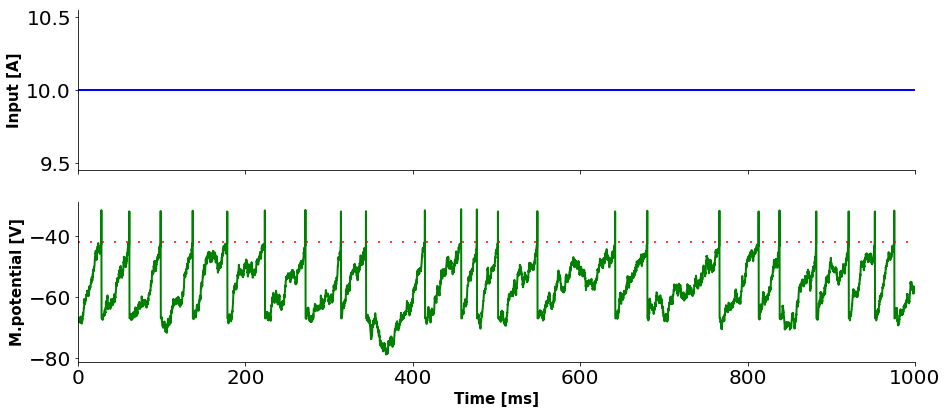

In [17]:
## Membrane potential and Input trace
fig = plt.figure(figsize=(15,10))

ax1 = plt.subplot(311)
#ax1.set_ylim(0,2)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel('Input [A]',fontsize=15,fontweight='bold')
plt.plot(times,I,'b',linewidth=2)

    # share x only
ax2 = plt.subplot(312, sharex=ax1)
ax2.set_ylabel('M.potential [V]',fontsize=15,fontweight='bold')
ax2.set_xlabel('Time [ms]',fontsize=15,fontweight='bold')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.plot(times, Vm,'g',linewidth=2)
ax2.plot((times[0], duration), (V_th, V_th), 'r',linestyle=':', dashes=(1, 5)) # put the treshold level
plt.setp(ax1.get_xticklabels(), visible=False)

# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible=False)

#ax3 = plt.subplot(313, sharex=ax1)
#ax3.set_ylim(2,5)
#ax3.set_ylabel('Firing rate [Hz]',fontsize=15,fontweight='bold')
#ax3.set_xlabel('Time [ms]',fontsize=15,fontweight='bold')
#plt.plot(time, ratio,'r',linewidth=2)

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

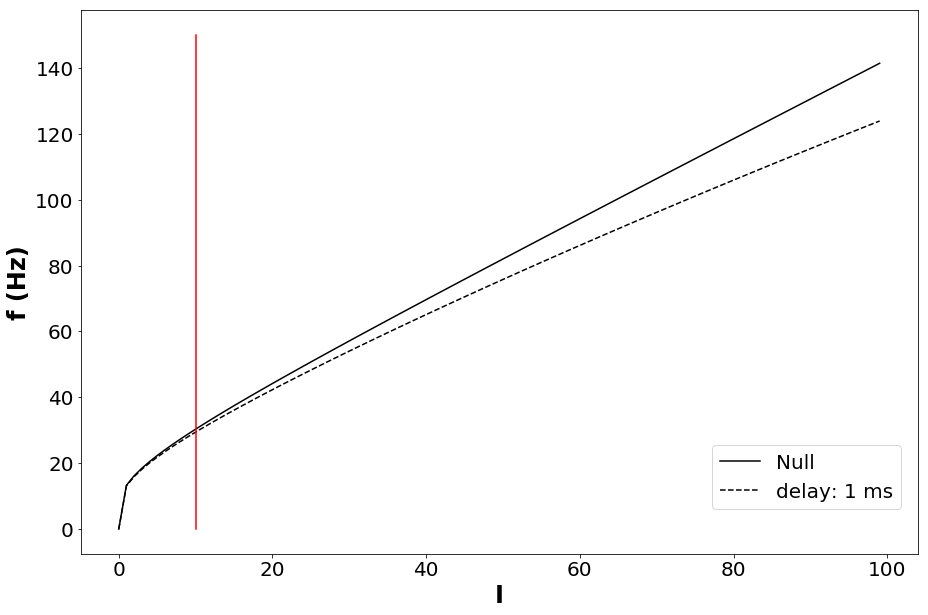

In [18]:
f1=np.zeros(100)
f2=np.zeros(100)

xi=np.arange(0,100)

for x in np.arange(1,100):
    f1[x] = 1.0 / (0 - tau_m * log(x/(x - V_th)))       *1000 # To convert in Hz
    f2[x] = 1.0 / (tau_ref - tau_m * log(x/(x - V_th))) *1000 # To convert in Hz


fig = plt.figure(figsize=(15,10))
plt.plot(xi,f1,'k-',label='Null')
plt.plot(xi,f2,'k--',label='delay: '+str(D)+' ms')
plt.plot([10, 10],[0, 150],'r-')
plt.xlabel('I [pA]',fontsize=24)
plt.ylabel('f (Hz)',fontsize=24)
plt.legend(bbox_to_anchor=(0.98, 0.20), loc=0, borderaxespad=0.,prop={'size':20})
#plt.yticks([0,.1,.2,.3])

plt.show()